In [82]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('../data/final_dataset.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) 
df.dropna(inplace=True)

# Using close and sentiment score
data = df[['Close', 'EMA_10', 'SMA_10', 'MACD', 'MACD_Signal', 'RSI']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)



In [83]:
def create_sequences(data, window_size):
    x, y = [], []
    for i in range(len(data) - window_size):
        x.append(data[i:i + window_size])
        y.append(data[i + window_size][0]) # Close price is the target
    return np.array(x), np.array(y)

window_size = 60 
x, y = create_sequences(scaled_data, window_size)

# split the data into training and testing sets
split = int(len(x)* 0.8) # 80% of 210 samples for training
x_train, x_test = x[:split], x[split:] 
y_train, y_test = y[:split], y[split:]

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 6)) # 6 features
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 6))

Epoch 1/50


c:\Users\priya\Downloads\stock-market-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.1802 - val_loss: 0.0323
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0309 - val_loss: 0.0165
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0331 - val_loss: 0.0293
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0276 - val_loss: 0.0179
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0264 - val_loss: 0.0154
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0217 - val_loss: 0.0259
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0256 - val_loss: 0.0184
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0294 - val_loss: 0.0150
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0262 - val_loss: 0.0235
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0193 - val_loss: 0.0178
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0219 - val_loss: 0.0220
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0185 - val_loss: 0.0229
Epoch 13/50


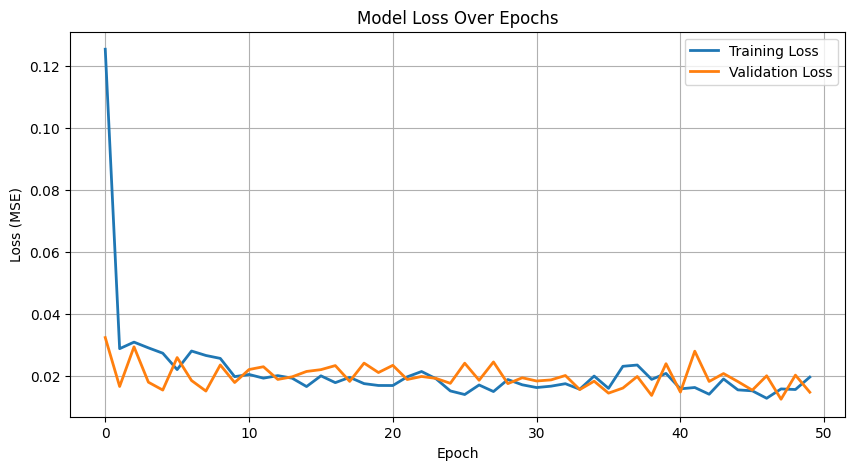

In [84]:
import tensorflow as tf 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 6)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(units=64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(x_train, y_train, epochs=50, batch_size=30, validation_data=(x_test, y_test), verbose=1)

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


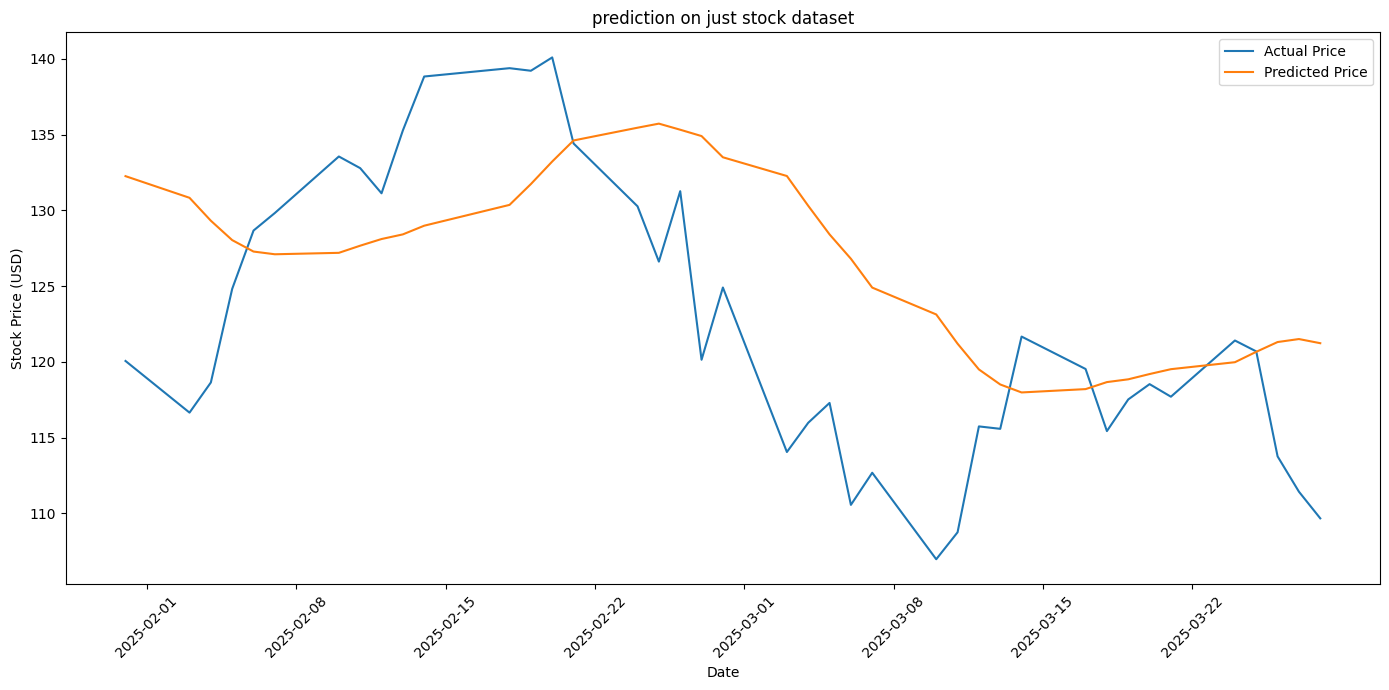

In [85]:
predicted = model.predict(x_test) #predicting based on the test set

predicted_extended = np.zeros((predicted.shape[0], 6))
predicted_extended[:, 0] = predicted[:, 0]

actual_extended = np.zeros((y_test.shape[0], 6))
actual_extended[:, 0] = y_test

predicted_inversed = scaler.inverse_transform(predicted_extended)[:, 0]
actual_inversed = scaler.inverse_transform(actual_extended)[:, 0]

test_dates = df.index[-len(y_test):]

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(test_dates, actual_inversed, label='Actual Price')
plt.plot(test_dates, predicted_inversed, label='Predicted Price')
plt.title('prediction on just stock dataset')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
model.save('../models/lstm_stock&indicators.h5')

In [87]:
import joblib
joblib.dump(scaler, '../models/scaler_stock&indicators.save')

['../models/scaler_stock&indicators.save']